# Objective

1. To analyze the customer behavior at a retail store during Black Friday Sales.
2. Predict the purchase amount of customers against various products to create personalized offers for customers against different products using Machine learning models.


In [ ]:
pip install numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.Collecting numpy==1.21.4


ERROR: scikit-learn 1.1.1 has requirement joblib>=1.0.0, but you'll have joblib 0.16.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [ ]:
df = pd.read_csv("E:\PGPDS\Project\Black Friday\sales.csv")

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.shape

(550068, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

#  Data Pre-processing

In [ ]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

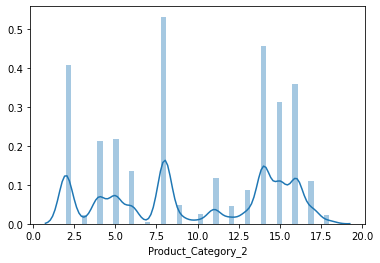

In [ ]:
#fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
sns.distplot(df['Product_Category_2'],hist=True,kde=True,rug=False,label='Sales of Product Category 2',norm_hist=True)

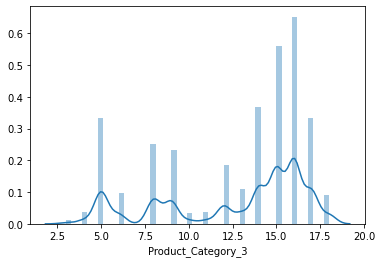

In [ ]:
sns.distplot(df['Product_Category_3'],hist=True,kde=True,rug=False,label='Sales of Product Category 3',norm_hist=True)

Replacing the missing Values with mean sales of the Product Category

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [ ]:
df.sample(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
339986,1004318,P00056442,M,26-35,5,B,3,0,2,4.000000,12.668243,13068
453926,1003869,P00039742,M,18-25,17,C,0,0,5,9.842329,12.668243,5254


In [ ]:
df.drop('User_ID', axis = 1, inplace = True)

In [ ]:
df.sort_values('Age', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 132077
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 50.4+ MB


In [ ]:
df['Age']=(df['Age'].str.strip('+'))

In [ ]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('int'))

In [ ]:
df['Gender'] = df['Gender'].replace({'M':'Male', 'F':'Female'})

In [ ]:
df['Product_Category_2'] = df.Product_Category_2.round(decimals = 2)
df['Product_Category_3'] = df.Product_Category_3.round(decimals = 2)

In [ ]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,Female,0-17,10,A,2,0,3,9.84,12.67,8370
48932,P00100442,Male,0-17,10,C,1,0,2,4.00,5.00,13129
48933,P00255842,Male,0-17,10,C,1,0,16,9.84,12.67,20195
48934,P00070342,Male,0-17,10,C,1,0,1,2.00,14.00,15819
48935,P00275542,Male,0-17,10,C,1,0,1,9.84,12.67,7587
...,...,...,...,...,...,...,...,...,...,...,...
47161,P00357242,Male,55,13,C,3,0,5,9.84,12.67,7134
47162,P00322942,Male,55,13,C,3,0,2,8.00,16.00,16325
114629,P00101942,Male,55,16,A,1,1,8,17.00,12.67,4056
188070,P00112342,Female,55,13,C,1,1,13,16.00,12.67,936


# Exploratory Data Analysis

Purchase Density distribution

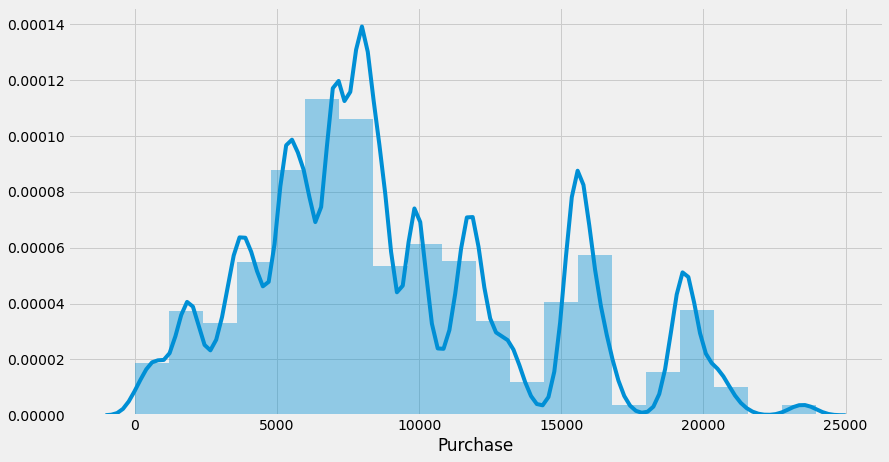

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
plt.ylabel = 'Density'
sns.distplot(df['Purchase'], bins=20)

Proportion of each items sold by Product ID

([<matplotlib.patches.Wedge at 0x2984ae12b80>,
 [Text(0.9927055242978385, 0.4966243469953459, 'P00265242'),
  Text(-0.28770633374247456, 1.1650000281220871, 'P00025442'),
  Text(-1.1958605202551795, 0.09958722857380549, 'P00110742'),
  Text(-0.4988715038901899, -1.0913877508046077, 'P00112142'),
  Text(0.8105516467143888, -0.8848762783624572, 'P00057642')],
 [Text(0.5455408737132266, 0.27291968618663154, '23.1%'),
  Text(-0.16782869468311012, 0.6795833497378841, '19.8%'),
  Text(-0.6975853034821881, 0.058092550001386536, '19.8%'),
  Text(-0.2910083772692774, -0.636642854636021, '19.2%'),
  Text(0.47282179391672674, -0.5161778290447666, '18.1%')])

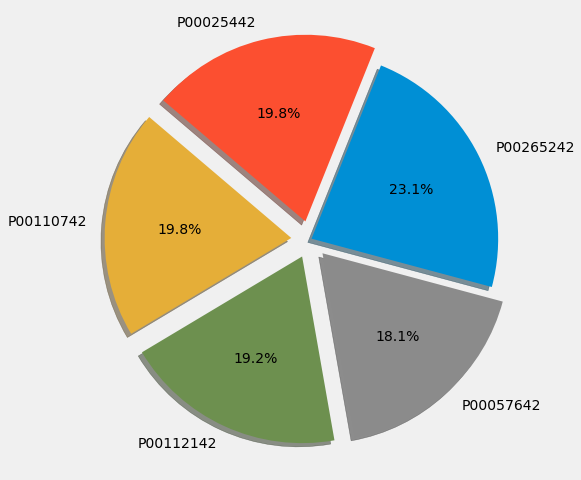

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(df['Product_ID'].value_counts().values[0:5],autopct='%0.1f%%',explode=[0.01,0.1,0.1,0.1,0.1],labels=df['Product_ID'].value_counts().index[0:5],shadow=True,startangle=345)

Proportion of Male and Female customers buying

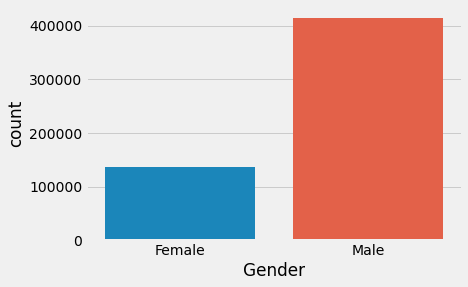

In [ ]:
sns.countplot(df['Gender'])

Proportion of customers by age group

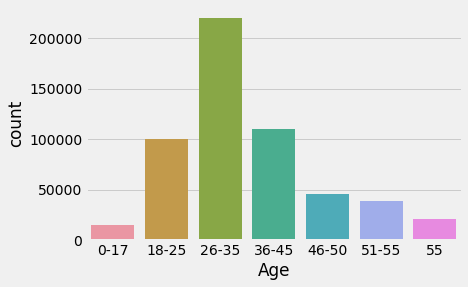

In [ ]:
sns.countplot(df['Age'])

Amount generated from each category

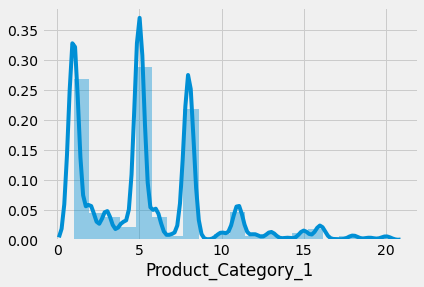

In [ ]:
sns.distplot(df['Product_Category_1'], bins = 20)

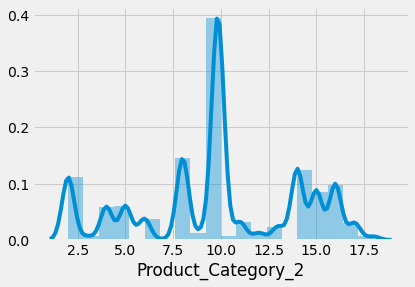

In [ ]:
sns.distplot(df['Product_Category_2'], bins=20)

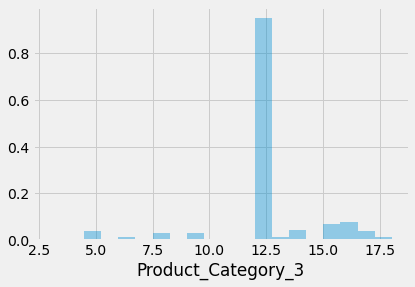

In [ ]:
sns.distplot(df['Product_Category_3'], bins=20)

Sales by City

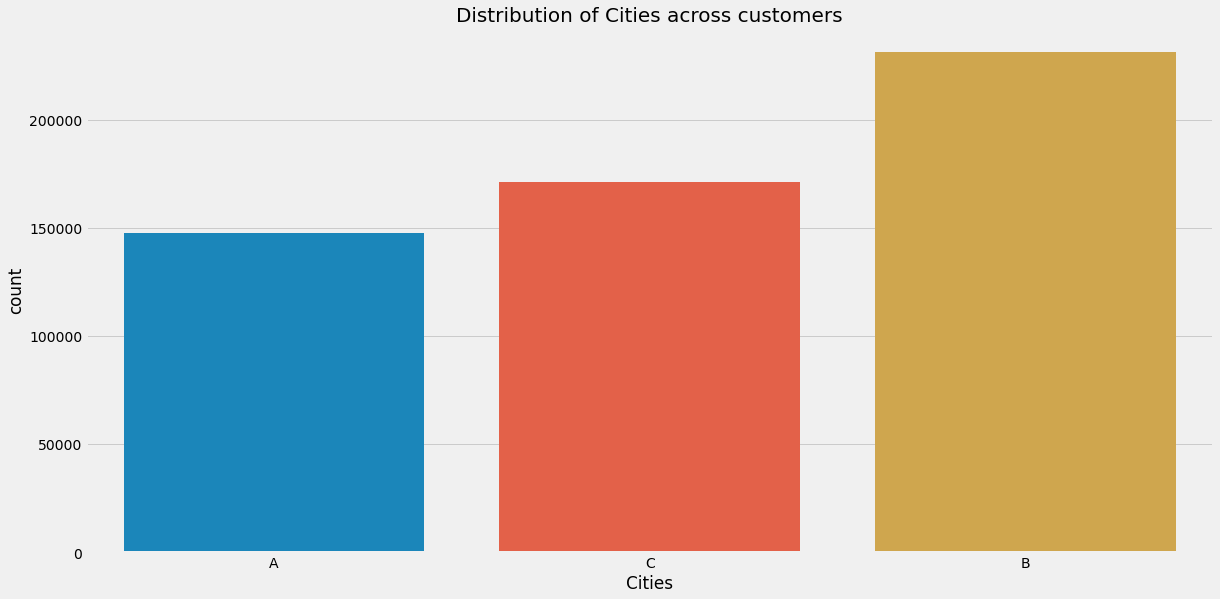

In [ ]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(df['City_Category'])
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
#plt.ylabel('Count')
plt.show()

Purchase capacity per city by Age Category

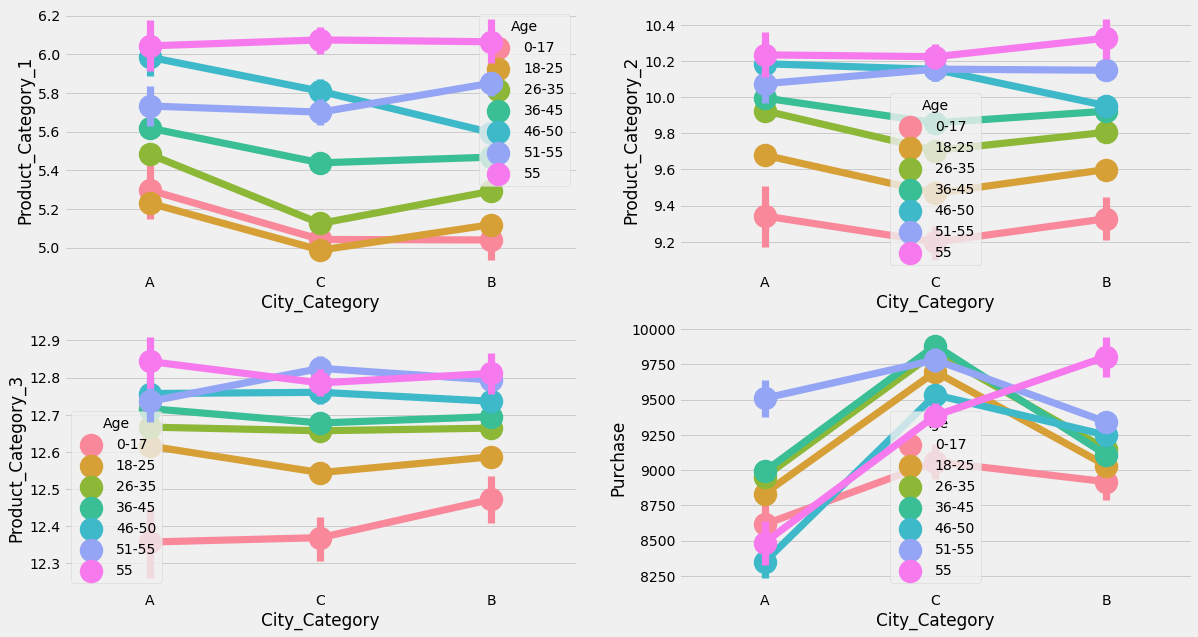

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,10))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,1]
                )

The stark difference in the purchase acoss City_Categories for the Age Group of 55 and above. It is highest in City_Category_B, as compared to the other age groups which tend to show high purchase in City_Category_C.

# Correlation Matrix

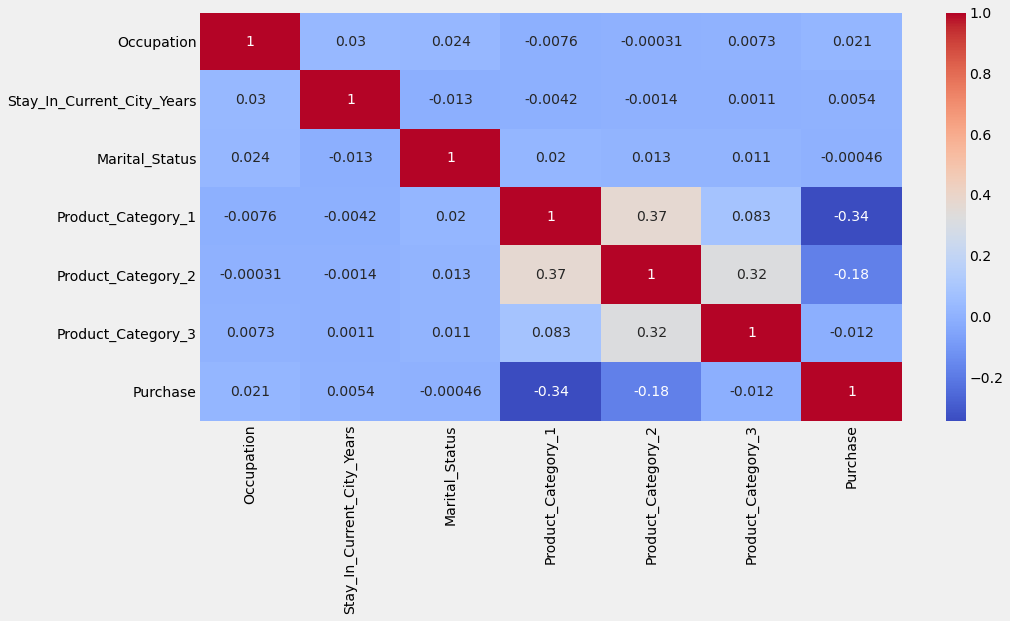

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Feature Scaling

In [ ]:
# categorical_cols = df.select_dtypes('object').columns.tolist()
# del categorical_cols[2]
# del categorical_cols[0]
# categorical_cols

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# encoder.fit(df[categorical_cols])


In [ ]:
encoded_df = pd.get_dummies(df, columns = ['Gender', 'City_Category', 'Age'])
encoded_df

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Female,Gender_Male,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55
0,P00069042,10,2,0,3,9.84,12.67,8370,1,0,1,0,0,1,0,0,0,0,0,0
48932,P00100442,10,1,0,2,4.00,5.00,13129,0,1,0,0,1,1,0,0,0,0,0,0
48933,P00255842,10,1,0,16,9.84,12.67,20195,0,1,0,0,1,1,0,0,0,0,0,0
48934,P00070342,10,1,0,1,2.00,14.00,15819,0,1,0,0,1,1,0,0,0,0,0,0
48935,P00275542,10,1,0,1,9.84,12.67,7587,0,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47161,P00357242,13,3,0,5,9.84,12.67,7134,0,1,0,0,1,0,0,0,0,0,0,1
47162,P00322942,13,3,0,2,8.00,16.00,16325,0,1,0,0,1,0,0,0,0,0,0,1
114629,P00101942,16,1,1,8,17.00,12.67,4056,0,1,1,0,0,0,0,0,0,0,0,1
188070,P00112342,13,1,1,13,16.00,12.67,936,1,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 132077
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Occupation                  550068 non-null  int64  
 2   Stay_In_Current_City_Years  550068 non-null  int32  
 3   Marital_Status              550068 non-null  int64  
 4   Product_Category_1          550068 non-null  int64  
 5   Product_Category_2          550068 non-null  float64
 6   Product_Category_3          550068 non-null  float64
 7   Purchase                    550068 non-null  int64  
 8   Gender_Female               550068 non-null  uint8  
 9   Gender_Male                 550068 non-null  uint8  
 10  City_Category_A             550068 non-null  uint8  
 11  City_Category_B             550068 non-null  uint8  
 12  City_Category_C             550068 non-null  uint8  
 13  Age_0-17      

# Splitting the Data

In [ ]:
encoded_df.head(10)

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Female,Gender_Male,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55
0,P00069042,10,2,0,3,9.84,12.67,8370,1,0,1,0,0,1,0,0,0,0,0,0
48932,P00100442,10,1,0,2,4.00,5.00,13129,0,1,0,0,1,1,0,0,0,0,0,0
48933,P00255842,10,1,0,16,9.84,12.67,20195,0,1,0,0,1,1,0,0,0,0,0,0
48934,P00070342,10,1,0,1,2.00,14.00,15819,0,1,0,0,1,1,0,0,0,0,0,0
48935,P00275542,10,1,0,1,9.84,12.67,7587,0,1,0,0,1,1,0,0,0,0,0,0
48936,P00338442,10,1,0,1,16.00,12.67,15830,0,1,0,0,1,1,0,0,0,0,0,0
160802,P00014542,10,3,0,8,9.84,12.67,9984,0,1,0,0,1,1,0,0,0,0,0,0
348245,P00327742,10,2,0,8,9.84,12.67,2245,0,1,0,0,1,1,0,0,0,0,0,0
348244,P00147842,10,2,0,8,9.84,12.67,8080,0,1,0,0,1,1,0,0,0,0,0,0
160801,P00112142,10,3,0,1,2.00,14.00,19286,0,1,0,0,1,1,0,0,0,0,0,0


In [ ]:
X = encoded_df.drop(columns=['Product_ID', 'Purchase'])
y = encoded_df['Purchase']

# Training the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size = 0.8, test_size = 0.2, random_state = 0)

# Ordinary Least Square Regression

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [ ]:
result = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     4393.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:36:23   Log-Likelihood:            -4.3439e+06
No. Observations:              440054   AIC:                         8.688e+06
Df Residuals:                  440038   BIC:                         8.688e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = result.predict(X_test_sm)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Adjusted R^2:', r2_score(y_test, y_pred))

MSE: 4694.334911804528
Adjusted R^2: 0.12501976661358805


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

In [ ]:
result = model.fit(X_train, y_train)

In [ ]:
print(result)

LinearRegression(normalize=True)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Adjusted R^2:', r2_score(y_test, y_pred))

MAE: 3595.3191275655827
MSE: 22036770.223539233
RMSE: 4694.333842361367
Adjusted R^2: 0.12502016528199933


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_1 = model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
print('Adjusted R^2:', r2_score(y_test, y_pred_1))

MAE: 2357.2867464243677
MSE: 11077719.455860145
RMSE: 3328.3208162465567
Adjusted R^2: 0.5601541859257009


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
y_pred_2 = model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('Adjusted R^2:', r2_score(y_test, y_pred_2))

MAE: 2219.365527755785
MSE: 9270633.160000041
RMSE: 3044.7714462665404
Adjusted R^2: 0.6319053569200723


# KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4097.729241290408
RMSE value for k=  2 is: 3584.542670101784
RMSE value for k=  3 is: 3418.4255707708116
RMSE value for k=  4 is: 3335.2866266794044
RMSE value for k=  5 is: 3287.816240244724
RMSE value for k=  6 is: 3266.948249134241
RMSE value for k=  7 is: 3249.5223155819076
RMSE value for k=  8 is: 3237.4065452664595
RMSE value for k=  9 is: 3235.9547193906487
RMSE value for k=  10 is: 3234.6272243786248
RMSE value for k=  11 is: 3232.798128206273
RMSE value for k=  12 is: 3233.4864623783164
RMSE value for k=  13 is: 3233.032774667021
RMSE value for k=  14 is: 3236.470112267718
RMSE value for k=  15 is: 3235.5914152250048
RMSE value for k=  16 is: 3238.642952068307
RMSE value for k=  17 is: 3241.706558017885
RMSE value for k=  18 is: 3244.62424994503
RMSE value for k=  19 is: 3248.2729061986074
RMSE value for k=  20 is: 3248.4244649984485


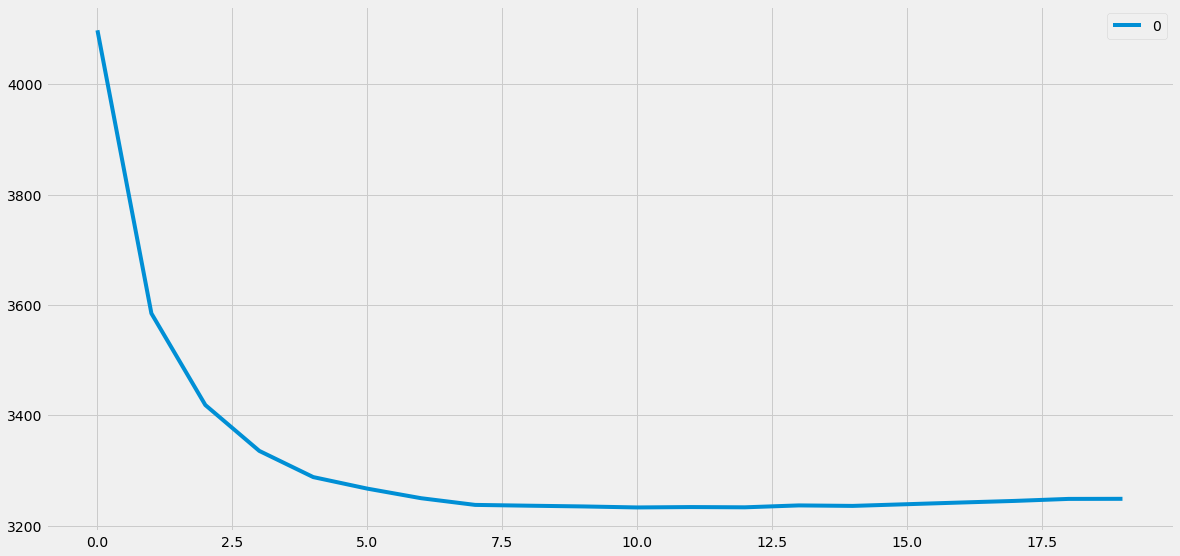

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

At k= 5, the RMSE is approximately 3287.81, and further increasing the k value doesn't have significant change in RMSE. We can safely say that k=5 will give us the best result in this case.

In [ ]:
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred_4=model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))
print('Adjusted R^2:', r2_score(y_test, y_pred_4))

MAE: 2400.3541712872907
MSE: 10809735.629616955
RMSE: 3287.816240244724
Adjusted R^2: 0.5707946038097561


# XGBoost Regressor

In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [ ]:
xgb_r.fit(X_train, y_train)

[01:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [ ]:
y_pred_5 = xgb_r.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_5)))
print('Adjusted R^2:', r2_score(y_test, y_pred_5))

MAE: 2272.6213480803267
MSE: 8850741.529431764
RMSE: 2975.0195847139835
Adjusted R^2: 0.6485773422331313


# Conclusion

XgBoost Regressor gives the best results with 64% Adj R2 value

# Scope of Study

To further improve the Score, we could go for Hyperparameter Tuning